## Маркетинговая аналитика Яндекс.Афиши

В рамках стажировки в отделе маркетинговой аналитики Яндекс.Афиши необходимо помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Для достижения цели предстоит изучить:
    
* как клиенты пользуются сервисом;

* когда делают первые покупки на сайте;

* сколько денег приносит компании каждый клиент;

* когда расходы на привлечение клиента окупаются.

### Шаг 1. Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
visits

Device               End Ts  Source Id             Start Ts  \
0         touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1       desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2         touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3       desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4       desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
...         ...                  ...        ...                  ...   
359395  desktop  2017-07-29 19:07:19          2  2017-07-29 19:07:00   
359396    touch  2018-01-25 17:38:19          1  2018-01-25 17:38:00   
359397  desktop  2018-03-03 10:12:19          4  2018-03-03 10:12:00   
359398  desktop  2017-11-02 10:12:19          5  2017-11-02 10:12:00   
359399    touch  2017-09-10 13:13:19          2  2017-09-10 13:13:00   

                         Uid  
0       16879256277535980062  
1         104060357244891740  
2        7459035603376831527  
3       16174680259334210214  
4        9969694820036681168  
...                      ...  
359395  18363291481961487539  
359396  18370831553019119586  
359397  18387297585500748294  
359398  18388616944624776485  
359399  18396128934054549559  

[359400 rows x 5 columns]

In [3]:
orders = pd.read_csv('/datasets/orders_log.csv')
orders

Buy Ts  Revenue                   Uid
0      2017-06-01 00:10:00    17.00  10329302124590727494
1      2017-06-01 00:25:00     0.55  11627257723692907447
2      2017-06-01 00:27:00     0.37  17903680561304213844
3      2017-06-01 00:29:00     0.55  16109239769442553005
4      2017-06-01 07:58:00     0.37  14200605875248379450
...                    ...      ...                   ...
50410  2018-05-31 23:50:00     4.64  12296626599487328624
50411  2018-05-31 23:50:00     5.80  11369640365507475976
50412  2018-05-31 23:54:00     0.30   1786462140797698849
50413  2018-05-31 23:56:00     3.67   3993697860786194247
50414  2018-06-01 00:02:00     3.42     83872787173869366

[50415 rows x 3 columns]

In [4]:
costs = pd.read_csv('/datasets/costs.csv')
costs

source_id          dt  costs
0             1  2017-06-01  75.20
1             1  2017-06-02  62.25
2             1  2017-06-03  36.53
3             1  2017-06-04  55.00
4             1  2017-06-05  57.08
...         ...         ...    ...
2537         10  2018-05-27   9.92
2538         10  2018-05-28  21.26
2539         10  2018-05-29  11.32
2540         10  2018-05-30  33.15
2541         10  2018-05-31  17.60

[2542 rows x 3 columns]

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [7]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [8]:
for column in visits.columns:
    if visits[column].dtype == 'object':
        
        print(column)
        
        print()
        
        print(visits[column].unique())
        
        print()
    
    else:
        
        print(column)
        
        print()
        
        print(visits[column].describe())
        
        print() 

Device

['touch' 'desktop']

End Ts

['2017-12-20 17:38:00' '2018-02-19 17:21:00' '2017-07-01 01:54:00' ...
 '2018-03-03 10:12:19' '2017-11-02 10:12:19' '2017-09-10 13:13:19']

Source Id

count    359400.000000
mean          3.750515
std           1.917116
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max          10.000000
Name: Source Id, dtype: float64

Start Ts

['2017-12-20 17:20:00' '2018-02-19 16:53:00' '2017-07-01 01:54:00' ...
 '2017-06-08 07:49:00' '2018-01-25 17:38:00' '2017-09-10 13:13:00']

Uid

count    3.594000e+05
mean     9.202557e+18
std      5.298433e+18
min      1.186350e+13
25%      4.613407e+18
50%      9.227413e+18
75%      1.372824e+19
max      1.844668e+19
Name: Uid, dtype: float64



In [9]:
for column in orders.columns:
    if orders[column].dtype == 'object':
        
        print(column)
        
        print()
        
        print(orders[column].unique())
        
        print()
    
    else:
        
        print(column)
        
        print()
        
        print(orders[column].describe())
        
        print() 

Buy Ts

['2017-06-01 00:10:00' '2017-06-01 00:25:00' '2017-06-01 00:27:00' ...
 '2018-05-31 23:54:00' '2018-05-31 23:56:00' '2018-06-01 00:02:00']

Revenue

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: Revenue, dtype: float64

Uid

count    5.041500e+04
mean     9.098161e+18
std      5.285742e+18
min      3.135781e+14
25%      4.533567e+18
50%      9.102274e+18
75%      1.368290e+19
max      1.844617e+19
Name: Uid, dtype: float64



In [10]:
for column in costs.columns:
    if costs[column].dtype == 'object':
        
        print(column)
        
        print()
        
        print(costs[column].unique())
        
        print()
    
    else:
        
        print(column)
        
        print()
        
        print(costs[column].describe())
        
        print() 

source_id

count    2542.000000
mean        4.857199
std         3.181581
min         1.000000
25%         2.000000
50%         4.000000
75%         9.000000
max        10.000000
Name: source_id, dtype: float64

dt

['2017-06-01' '2017-06-02' '2017-06-03' '2017-06-04' '2017-06-05'
 '2017-06-06' '2017-06-07' '2017-06-08' '2017-06-09' '2017-06-10'
 '2017-06-11' '2017-06-12' '2017-06-13' '2017-06-14' '2017-06-15'
 '2017-06-16' '2017-06-17' '2017-06-18' '2017-06-19' '2017-06-20'
 '2017-06-21' '2017-06-22' '2017-06-23' '2017-06-24' '2017-06-25'
 '2017-06-26' '2017-06-27' '2017-06-28' '2017-06-29' '2017-06-30'
 '2017-07-01' '2017-07-02' '2017-07-03' '2017-07-04' '2017-07-05'
 '2017-07-06' '2017-07-07' '2017-07-08' '2017-07-09' '2017-07-10'
 '2017-07-11' '2017-07-12' '2017-07-13' '2017-07-14' '2017-07-15'
 '2017-07-16' '2017-07-17' '2017-07-18' '2017-07-19' '2017-07-20'
 '2017-07-21' '2017-07-22' '2017-07-23' '2017-07-24' '2017-07-25'
 '2017-07-26' '2017-07-27' '2017-07-28' '2017-07-29' '2017

Во-первых, приводим названия столбцов в таблицах к нижнему регистру.

In [11]:
visits.columns = visits.columns.str.lower()

In [12]:
orders.columns = orders.columns.str.lower()

Во-вторых, изменяем названия столбцов в таблицах на единые.

In [13]:
visits = visits.rename(columns = {'end ts':'end_ts', 'source id':'source_id', 'start ts':'start_ts'})
visits

device               end_ts  source_id             start_ts  \
0         touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1       desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2         touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3       desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4       desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
...         ...                  ...        ...                  ...   
359395  desktop  2017-07-29 19:07:19          2  2017-07-29 19:07:00   
359396    touch  2018-01-25 17:38:19          1  2018-01-25 17:38:00   
359397  desktop  2018-03-03 10:12:19          4  2018-03-03 10:12:00   
359398  desktop  2017-11-02 10:12:19          5  2017-11-02 10:12:00   
359399    touch  2017-09-10 13:13:19          2  2017-09-10 13:13:00   

                         uid  
0       16879256277535980062  
1         104060357244891740  
2        7459035603376831527  
3       16174680259334210214  
4        9969694820036681168  
...                      ...  
359395  18363291481961487539  
359396  18370831553019119586  
359397  18387297585500748294  
359398  18388616944624776485  
359399  18396128934054549559  

[359400 rows x 5 columns]

In [14]:
orders = orders.rename(columns = {'buy ts':'buy_ts'})
orders

buy_ts  revenue                   uid
0      2017-06-01 00:10:00    17.00  10329302124590727494
1      2017-06-01 00:25:00     0.55  11627257723692907447
2      2017-06-01 00:27:00     0.37  17903680561304213844
3      2017-06-01 00:29:00     0.55  16109239769442553005
4      2017-06-01 07:58:00     0.37  14200605875248379450
...                    ...      ...                   ...
50410  2018-05-31 23:50:00     4.64  12296626599487328624
50411  2018-05-31 23:50:00     5.80  11369640365507475976
50412  2018-05-31 23:54:00     0.30   1786462140797698849
50413  2018-05-31 23:56:00     3.67   3993697860786194247
50414  2018-06-01 00:02:00     3.42     83872787173869366

[50415 rows x 3 columns]

В-третьих, изменяем форматы столбцов с датами на соответствующие.

In [15]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'],format="%Y-%m-%d %H:%M")
visits['start_ts'] = pd.to_datetime(visits['start_ts'],format="%Y-%m-%d %H:%M")
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'],format="%Y-%m-%d %H:%M")
costs['dt'] = pd.to_datetime(costs['dt'],format="%Y-%m-%d %H:%M")

#### Вывод

Загрузив данные, мы обнаружили разрозненное написание наименования столбцов в таблицах, а также неверные форматы столбцов.

Для удобства дальнейшего анализа столбцы были приведены к единым наименованиям, а формат столбцов с датами был изменен на формат "дата и время".

### 2.1. Продуктовые метрики

##### 1) Чтобы посчитать недельное и месячное использование, выделим в отдельные столбцы год, месяц и неделю, а также полную дату

In [16]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

In [17]:
visits

device              end_ts  source_id            start_ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
...         ...                 ...        ...                 ...   
359395  desktop 2017-07-29 19:07:19          2 2017-07-29 19:07:00   
359396    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
359397  desktop 2018-03-03 10:12:19          4 2018-03-03 10:12:00   
359398  desktop 2017-11-02 10:12:19          5 2017-11-02 10:12:00   
359399    touch 2017-09-10 13:13:19          2 2017-09-10 13:13:00   

                         uid  session_year  session_month  session_week  \
0       16879256277535980062          2017             12            51   
1         104060357244891740          2018              2             8   
2        7459035603376831527          2017              7            26   
3       16174680259334210214          2018              5            20   
4        9969694820036681168          2017             12            52   
...                      ...           ...            ...           ...   
359395  18363291481961487539          2017              7            30   
359396  18370831553019119586          2018              1             4   
359397  18387297585500748294          2018              3             9   
359398  18388616944624776485          2017             11            44   
359399  18396128934054549559          2017              9            36   

       session_date  
0        2017-12-20  
1        2018-02-19  
2        2017-07-01  
3        2018-05-20  
4        2017-12-27  
...             ...  
359395   2017-07-29  
359396   2018-01-25  
359397   2018-03-03  
359398   2017-11-02  
359399   2017-09-10  

[359400 rows x 9 columns]

In [18]:
dau_total = visits.groupby(['session_date']).agg({'uid':'nunique'}).mean()
wau_total = visits.groupby(['session_year','session_week']).agg({'uid':'nunique'}).mean()
mau_total = visits.groupby(['session_year','session_month']).agg({'uid':'nunique'}).mean()

In [19]:
print('DAU — количество уникальных пользователей в день: {}'.format(int(dau_total)))
print('WAU — количество уникальных пользователей в неделю: {}'.format(int(wau_total)))
print('MAU — количество уникальных пользователей в месяц: {}'.format(int(mau_total)))     

DAU — количество уникальных пользователей в день: 907
WAU — количество уникальных пользователей в неделю: 5716
MAU — количество уникальных пользователей в месяц: 23228


 Рассчитаем регулярность использования сервиса — то, как часто пользователи к нему обращаются.

In [20]:
sticky_wau=dau_total/wau_total*100
sticky_wau

uid    15.884409
dtype: float64

In [21]:
sticky_mau=dau_total/mau_total*100
sticky_mau

uid    3.90897
dtype: float64

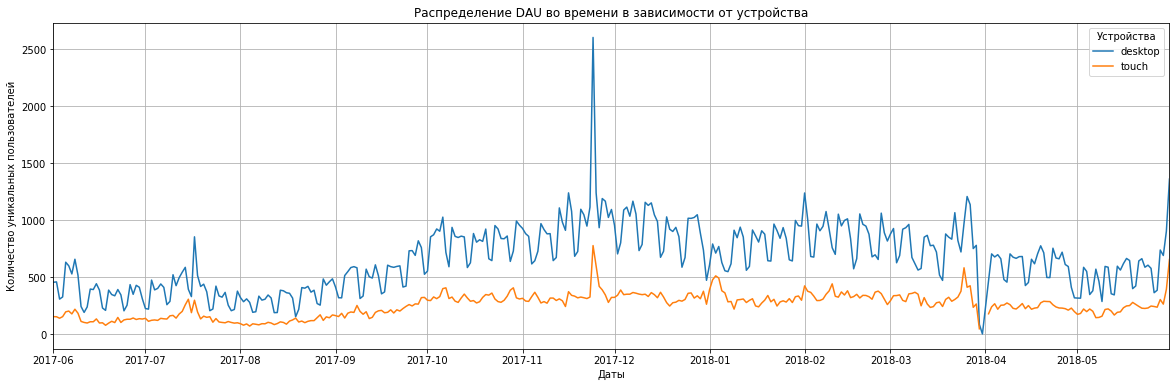

In [22]:
visits.pivot_table(index = 'session_date', values = 'uid', columns='device', aggfunc = 'nunique').plot(style='-', grid=True, figsize=(20, 6))
plt.title('Распределение DAU во времени в зависимости от устройства')
plt.xlabel('Даты')
plt.ylabel('Количество уникальных пользователей')
plt.legend(title = 'Устройства')
plt.show()

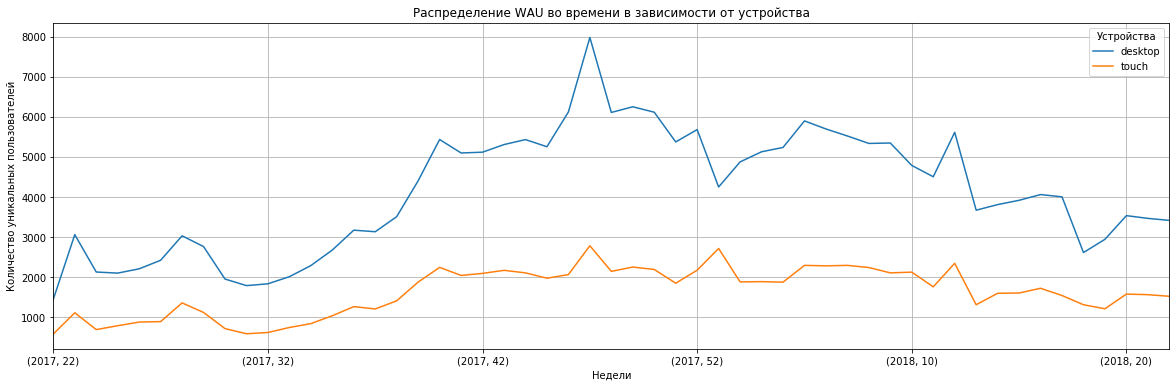

In [23]:
visits.pivot_table(index = ['session_year','session_week'], values = 'uid', columns='device', aggfunc = 'nunique').plot(style='-', grid=True, figsize=(20, 6))
plt.title('Распределение WAU во времени в зависимости от устройства')
plt.xlabel('Недели')
plt.ylabel('Количество уникальных пользователей')
plt.legend(title = 'Устройства')
plt.show()

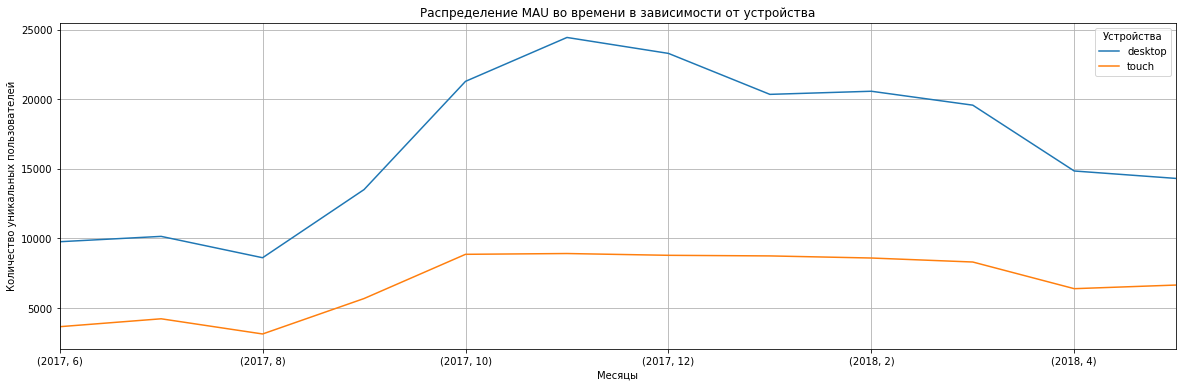

In [24]:
visits.pivot_table(index = ['session_year','session_month'], values = 'uid', columns='device', aggfunc = 'nunique').plot(style='-', grid=True, figsize=(20, 6))
plt.title('Распределение MAU во времени в зависимости от устройства')
plt.xlabel('Месяцы')
plt.ylabel('Количество уникальных пользователей')
plt.legend(title = 'Устройства')
plt.show()

Из данных графиков мы видим, что пик количества новых пользователей пришелся на конец ноября 2017 года - 2600 человек за день. Можем предположить, что это связано с долгожданным выходом какого-то новогоднего фильма. Затем произошло небольшое снижение. Самое низкое значение, которое приближено к 0, наблюдается в конце марта 2018.

Проанализировов данные показатели в разрезе устройств, мы видим, что больше новых пользователей на сайт Яндекс.Афиши приходят с десктопных устройств.

##### 2) Определим, сколько раз за день пользователи в среднем заходят на сайт.

In [25]:
sessions_per_user = visits.groupby(['session_year', 'session_date']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sess_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user.reset_index()

session_year session_date  n_sessions  n_users  sess_per_user
0            2017   2017-06-01         664      605       1.097521
1            2017   2017-06-02         658      608       1.082237
2            2017   2017-06-03         477      445       1.071910
3            2017   2017-06-04         510      476       1.071429
4            2017   2017-06-05         893      820       1.089024
..            ...          ...         ...      ...            ...
359          2018   2018-05-27         672      620       1.083871
360          2018   2018-05-28        1156     1039       1.112608
361          2018   2018-05-29        1035      948       1.091772
362          2018   2018-05-30        1410     1289       1.093871
363          2018   2018-05-31        2256     1997       1.129695

[364 rows x 5 columns]

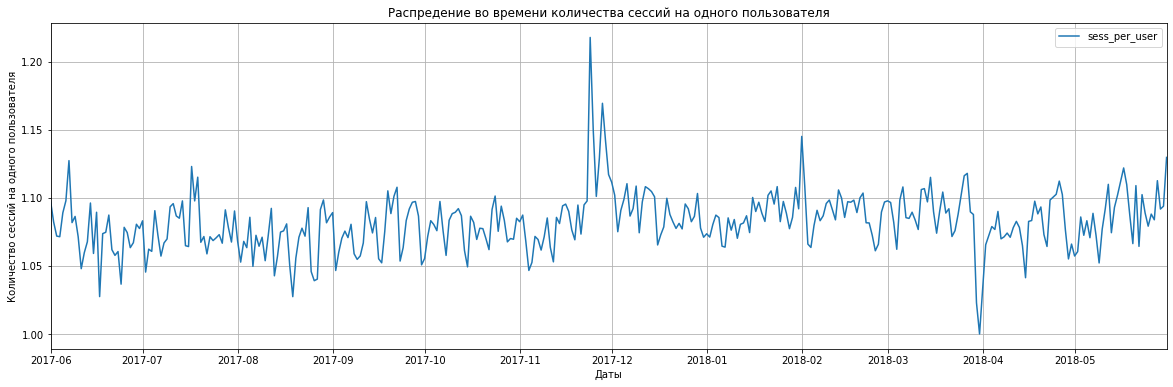

In [26]:
sessions_per_user.pivot_table(index = 'session_date', values = 'sess_per_user', aggfunc = 'sum').plot(style='-', grid=True, figsize=(20, 6))
plt.title('Распредение во времени количества сессий на одного пользователя')
plt.xlabel('Даты')
plt.ylabel('Количество сессий на одного пользователя')
plt.show()

Пики графика по количеству сессий на одного пользователя практически совпадают с пиками графиков, где отображено количество новых пользователей. То есть, больше всего сессий на одного пользователя приходится на конец ноября 2017 - около 1,23. Минимальный пик также наблюдаем в конце марта 2018. 

##### 3) Определяем среднюю продолжительность сессии или ASL

In [27]:
visits['session_duration_sec'] = (visits['end_ts']-visits['start_ts']).dt.seconds # находим длительность, вычитая из времени входа на сервис время выхода
print('Средняя продолжительность пользовательской сессии за весь период: {:.2f}'.format(visits['session_duration_sec'].mean()))

Средняя продолжительность пользовательской сессии за весь период: 643.51


In [28]:
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

Text(0, 0.5, 'Количество')

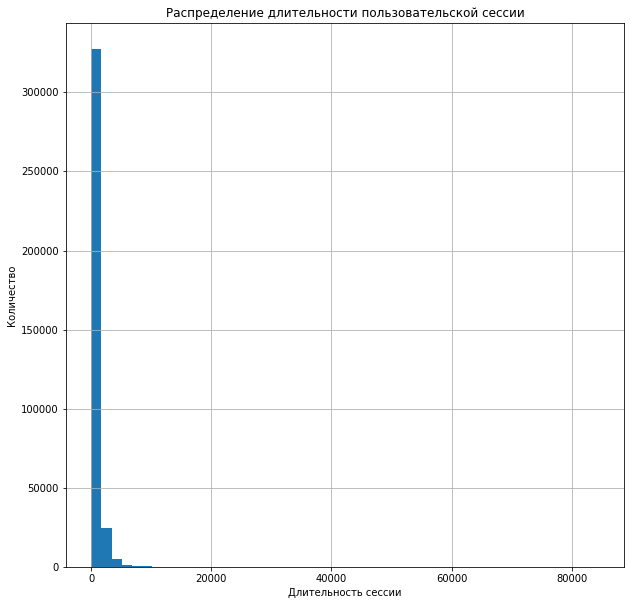

In [29]:
visits['session_duration_sec'].hist(bins = 50,figsize = (10,10))
plt.title('Распределение длительности пользовательской сессии')
plt.xlabel('Длительность сессии')
plt.ylabel('Количество')

In [30]:
visits_desktop = visits.query('device == "desktop"')
visits_touch = visits.query('device == "touch"')

In [31]:
visits_desktop['session_duration_sec'].max()

84480

In [32]:
visits_touch['session_duration_sec'].max()

30840

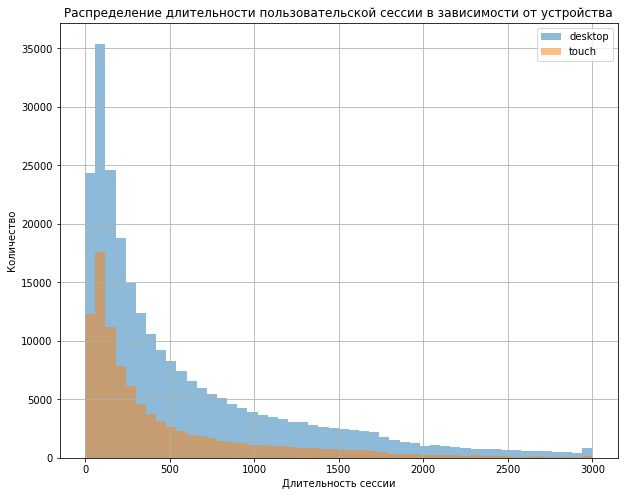

In [33]:
visits_desktop['session_duration_sec'].hist(range = (0,3000), bins=50, figsize = (10, 8), alpha = 0.5, label='desktop')
visits_touch['session_duration_sec'].hist(range = (0,3000), bins=50, figsize = (10, 8), alpha = 0.5, label = 'touch')
plt.title('Распределение длительности пользовательской сессии в зависимости от устройства')
plt.xlabel('Длительность сессии')
plt.ylabel('Количество')
plt.legend()

На данном графике наблюдаем ассиметричное распределение с длинным хвостом высоких значений. Очень высоко количество значений, стремящихся к нулю. Пик приходится на значения 100-200 секунд. 

Больше всего времени пользователи проводят на десктопных устройствах, где максимальным значением является 84480 секунд. С мобильных устройств максимальное значение - 30840 секунд.

In [34]:
asl = visits['session_duration_sec'].mode() # т.к. распределение не является нормальным, для определения среднего используем моду
print('Значение продолжительности сессии с наибольшей частотой: {}'.format(asl))

Значение продолжительности сессии с наибольшей частотой: 0    60
dtype: int64


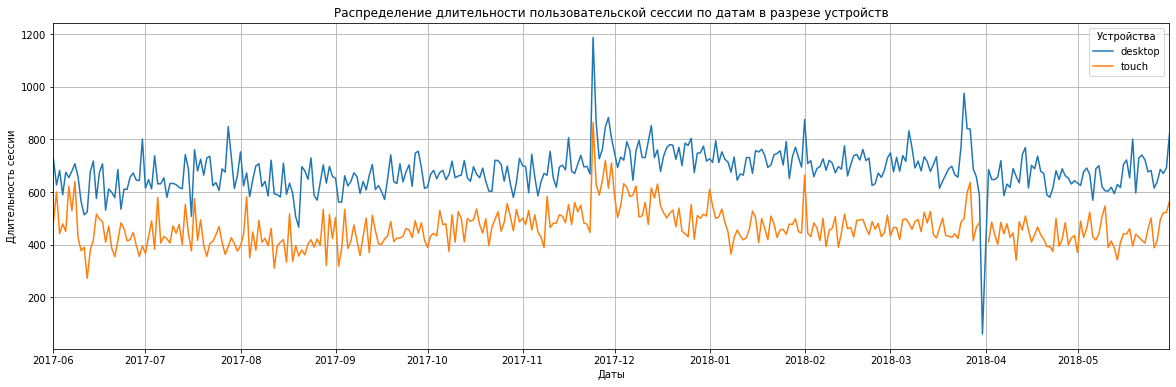

In [35]:
visits.pivot_table(index = ['session_date'], values = 'session_duration_sec', columns='device', aggfunc = 'mean').plot(style='-', grid=True, figsize=(20, 6))
plt.title('Распределение длительности пользовательской сессии по датам в разрезе устройств')
plt.xlabel('Даты')
plt.ylabel('Длительность сессии')
plt.legend(title = 'Устройства')
plt.show()

Наиболее высокое значение как на десктопных, так и на мобильных устройствах наблюдается в конце ноября 2017 года. Наиболее низкое - в конце марта 2018.

Более длительные сессии происходят, когда пользователи заходят с десктопных устройств.

#### Вывод

Мы расчитали средние продуктовые метрики:
* DAU — количество уникальных пользователей в день: 907
* WAU — количество уникальных пользователей в неделю: 5716
* MAU — количество уникальных пользователей в месяц: 23228

Проанализировав продуктовые метрики, мы обнаружили, что с десктопных устройств привлекается больше новых пользователей, пользователи чаще в среднем посещают сервис и их сессии более длительные, чем с мобильных устройств.

Изменение метрик во времени показало, что все метрики имеют два ярко выраженных пика: высокий в конце ноября 2017 года и низкий в конце марта 2018. 

Можно предположить, что высокий пик посещений и длительности сессий связан с выходом какого-либо блокбастера или с проведением акции, привлекающей новых клиентов(т.к. количество новых пользователей после этого пика стало выше, чем до него).

Низкий пик посещений и длительности сессий может свидетельствовать о том, что на сервисе в тот день произошел технический сбой.

### 2.2 Метрики электронной коммерции

##### 1) Исследуем, когда пользователи начинают покупать.

In [36]:
first_order = orders.groupby('uid')['buy_ts'].min().reset_index() # находим, когда пользователь сделал первую покупку
first_order

uid              buy_ts
0           313578113262317 2018-01-03 21:51:00
1          1575281904278712 2017-06-03 10:13:00
2          2429014661409475 2017-10-11 18:33:00
3          2464366381792757 2018-01-28 15:54:00
4          2551852515556206 2017-11-24 10:14:00
...                     ...                 ...
36518  18445147675727495770 2017-11-24 09:03:00
36519  18445407535914413204 2017-09-22 23:55:00
36520  18445601152732270159 2018-03-26 22:54:00
36521  18446156210226471712 2018-02-18 19:34:00
36522  18446167067214817906 2017-10-17 10:16:00

[36523 rows x 2 columns]

In [37]:
first_visit = visits.groupby(['uid','device'])['start_ts'].min().reset_index() # находим, когда пользователь впервые посетил сайт
first_visit

uid   device            start_ts
0             11863502262781    touch 2018-03-01 17:27:00
1             49537067089222    touch 2018-02-06 15:55:00
2            297729379853735  desktop 2017-06-07 18:47:00
3            313578113262317  desktop 2017-09-18 22:49:00
4            325320750514679  desktop 2017-09-30 14:29:00
...                      ...      ...                 ...
235863  18446403737806311543  desktop 2017-11-30 03:36:00
235864  18446424184725333426    touch 2017-12-06 20:32:00
235865  18446556406699109058    touch 2018-01-01 16:29:00
235866  18446621818809592527  desktop 2017-12-27 13:27:00
235867  18446676030785672386  desktop 2017-10-04 16:01:00

[235868 rows x 3 columns]

In [38]:
purchase = first_order.merge(first_visit, on = 'uid')
purchase

uid              buy_ts   device            start_ts
0           313578113262317 2018-01-03 21:51:00  desktop 2017-09-18 22:49:00
1          1575281904278712 2017-06-03 10:13:00    touch 2017-06-03 10:13:00
2          2429014661409475 2017-10-11 18:33:00  desktop 2017-10-11 17:14:00
3          2464366381792757 2018-01-28 15:54:00  desktop 2018-01-27 20:10:00
4          2551852515556206 2017-11-24 10:14:00  desktop 2017-11-24 10:14:00
...                     ...                 ...      ...                 ...
39509  18445407535914413204 2017-09-22 23:55:00    touch 2017-09-24 23:34:00
39510  18445601152732270159 2018-03-26 22:54:00  desktop 2017-08-07 11:51:00
39511  18446156210226471712 2018-02-18 19:34:00  desktop 2017-11-07 10:01:00
39512  18446156210226471712 2018-02-18 19:34:00    touch 2018-02-19 10:17:00
39513  18446167067214817906 2017-10-17 10:16:00  desktop 2017-10-17 10:05:00

[39514 rows x 4 columns]

In [39]:
#FIXIT момент покупки происходит позже начала сессии, так вычитать надо наоборот
purchase['duration_before_buy'] = (purchase['buy_ts'] - purchase['start_ts']).dt.seconds # расчитываем время в секундах, сколько требуется для совершения первой покупки


Text(0, 0.5, 'Количество')

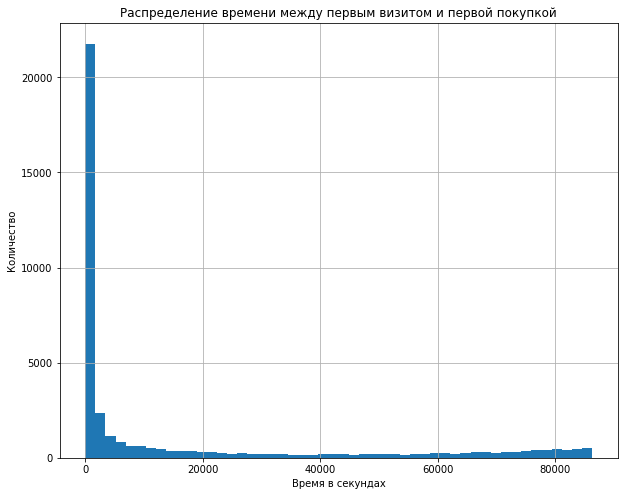

In [40]:
purchase['duration_before_buy'].hist(bins=50, figsize = (10, 8))
plt.title('Распределение времени между первым визитом и первой покупкой')
plt.xlabel('Время в секундах')
plt.ylabel('Количество')

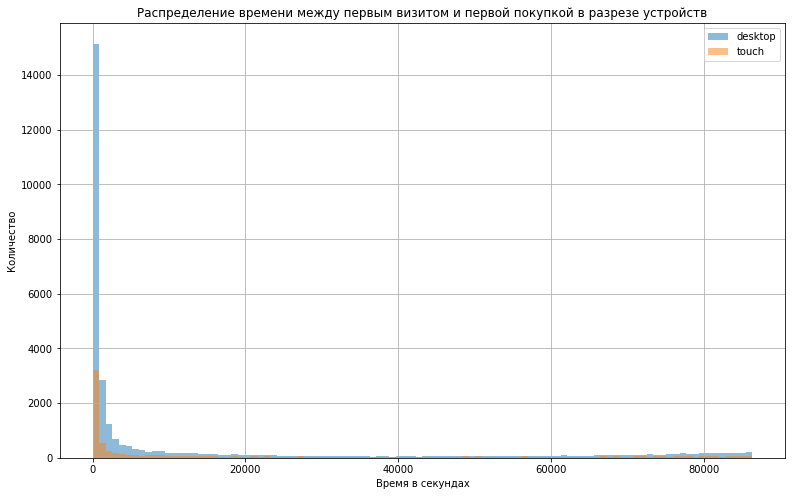

In [41]:
purchase.query('device == "desktop"')['duration_before_buy'].hist(bins=100, figsize = (13, 8), alpha = 0.5, label='desktop')
purchase.query('device == "touch"')['duration_before_buy'].hist(bins=100, figsize = (13, 8), alpha = 0.5, label='touch')
plt.title('Распределение времени между первым визитом и первой покупкой в разрезе устройств')
plt.xlabel('Время в секундах')
plt.ylabel('Количество')
plt.legend()

Определим наиболее часто встречающееся значение времени между первым визитом и первой покупкой с использованием моды (т.к. распределение не является нормальным): 

In [42]:
purchase.query('device == "desktop"')['duration_before_buy'].mode()

0    60
dtype: int64

In [43]:
purchase.query('device == "touch"')['duration_before_buy'].mode()

0    0
dtype: int64

Было расчитано время между первым визитом и первой покупкой.

Из распределения мы видим, что наиболее часто пользователи покупают через примерно 60 секунд.

Также было обнаружено, что модой значений среди мобильных устройств является 0. Данное значение не может соответствовать действительности.

##### 2) Рассчитаем среднее количество покупок на одного клиента

In [44]:
first_order = first_order.rename(columns = {'buy_ts':'first_buy'})

In [45]:
orders = orders.merge(first_order, on = 'uid')
orders

buy_ts  revenue                   uid           first_buy
0     2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00
1     2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00
2     2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00
3     2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00
4     2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00
...                   ...      ...                   ...                 ...
50410 2018-05-31 23:50:00     4.64  12296626599487328624 2018-05-31 23:50:00
50411 2018-05-31 23:50:00     5.80  11369640365507475976 2018-05-31 23:50:00
50412 2018-05-31 23:54:00     0.30   1786462140797698849 2018-05-31 23:54:00
50413 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31 23:56:00
50414 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01 00:02:00

[50415 rows x 4 columns]

In [46]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_buy'].astype('datetime64[M]')

In [47]:
purchases_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'buy_ts':'nunique', 'uid':'nunique'}) # датафрейм, где для каждой когорты пользователей и каждого месяца найдено число покупок и количество человек, совершивших покупки.
purchases_grouped_by_cohorts['orders_per_player'] = purchases_grouped_by_cohorts['buy_ts']/purchases_grouped_by_cohorts['uid'] # среднее количество покупок на пользователя

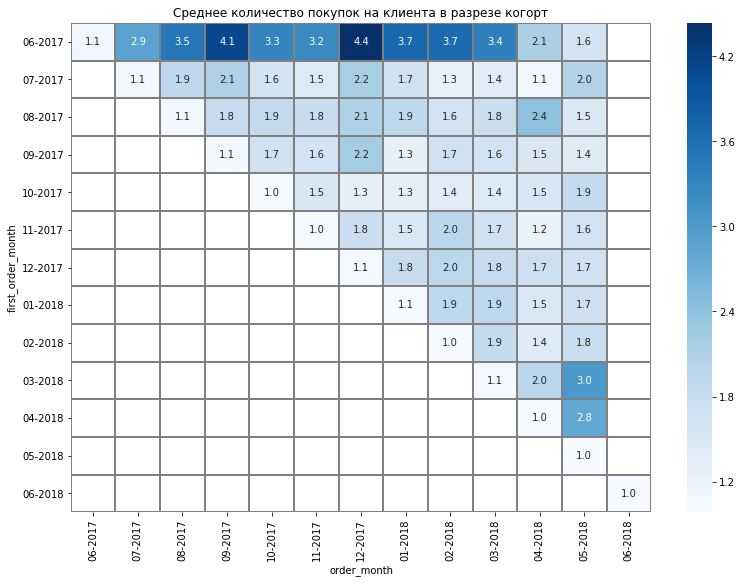

In [48]:
mean_purchases_pivot  = purchases_grouped_by_cohorts.pivot_table(index ='first_order_month', columns='order_month', values = 'orders_per_player')
plt.figure(figsize=(13, 9))
plt.title('Среднее количество покупок на клиента в разрезе когорт')
ax = sns.heatmap(mean_purchases_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap = 'Blues')
ax.set_yticklabels(mean_purchases_pivot.index.strftime('%m-%Y'))
ax.set_xticklabels(mean_purchases_pivot.columns.strftime('%m-%Y'))
plt.show()

На тепловой карте, на которой отображено среднее количество покупок на одного клиента в разрезе когорт, мы видим, что больше всего покупок за представленный период совершают пользователи когорты июня 2017 года. Максимальные значения за сентябрь и декабрь 2017 года.

Представители остальных когорт (за исключением когорт марта и апреля 2018), совершают 2 и менее покупок в месяц.

Также видим, что за декабрь 2017 почти все когорты совершили в среднем более 2 покупок. Меньше всего покупок совершалось за аппрель 2018.

##### 3) Рассчитаем среднюю выручку с пользователя 

In [49]:
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'uid':'nunique','revenue':'sum'}) # рассчитываем общую прибыль с одного покупателя
orders_grouped_by_cohorts['revenue_per_uid'] = orders_grouped_by_cohorts['revenue']/orders_grouped_by_cohorts['uid'] # найдём среднюю выручку покупателя
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()

# Построим сводную таблицу изменения среднего чека в когортах по месяцу совершения покупки и оценим, как изменяется средняя выручка с течением времени:
orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='order_month',values='revenue_per_uid',aggfunc='mean')

order_month        2017-06-01  2017-07-01  2017-08-01  2017-09-01  2017-10-01  \
first_order_month                                                               
2017-06-01           4.724414   16.095410   17.706800   35.764815   23.506591   
2017-07-01                NaN    6.010218   12.396346   21.035965   10.786094   
2017-08-01                NaN         NaN    5.276518   11.148793   11.851321   
2017-09-01                NaN         NaN         NaN    5.644529   22.188385   
2017-10-01                NaN         NaN         NaN         NaN    5.003733   
2017-11-01                NaN         NaN         NaN         NaN         NaN   
2017-12-01                NaN         NaN         NaN         NaN         NaN   
2018-01-01                NaN         NaN         NaN         NaN         NaN   
2018-02-01                NaN         NaN         NaN         NaN         NaN   
2018-03-01                NaN         NaN         NaN         NaN         NaN   
2018-04-01                NaN         NaN         NaN         NaN         NaN   
2018-05-01                NaN         NaN         NaN         NaN         NaN   
2018-06-01                NaN         NaN         NaN         NaN         NaN   

order_month        2017-11-01  2017-12-01  2018-01-01  2018-02-01  2018-03-01  \
first_order_month                                                               
2017-06-01          22.207761   31.011935   25.033191   19.295690   27.233556   
2017-07-01           6.938163    7.896842    6.421111    6.992821    7.382143   
2017-08-01          12.182955   16.921250   12.139063    9.620333   12.610455   
2017-09-01          13.445200  138.669189   19.881538   26.095000   27.437121   
2017-10-01          11.287427    6.753252    7.413152    7.072796    7.255139   
2017-11-01           5.154683    7.339054    6.786583   12.510660    7.457284   
2017-12-01                NaN    4.738191    7.816575   39.366019   48.135052   
2018-01-01                NaN         NaN    4.135636    8.721228   12.365542   
2018-02-01                NaN         NaN         NaN    4.156987    8.610000   
2018-03-01                NaN         NaN         NaN         NaN    4.838803   
2018-04-01                NaN         NaN         NaN         NaN         NaN   
2018-05-01                NaN         NaN         NaN         NaN         NaN   
2018-06-01                NaN         NaN         NaN         NaN         NaN   

order_month        2018-04-01  2018-05-01  2018-06-01  
first_order_month                                      
2017-06-01          25.681333    9.804151         NaN  
2017-07-01          12.861818   11.513846         NaN  
2017-08-01          21.070000    8.307419         NaN  
2017-09-01          16.961351   11.044651         NaN  
2017-10-01           6.573214    7.479701         NaN  
2017-11-01           4.580833    7.564839         NaN  
2017-12-01          27.431400   23.518413         NaN  
2018-01-01          11.199767    4.699556         NaN  
2018-02-01           4.942414    6.941026         NaN  
2018-03-01          11.811667   19.221897         NaN  
2018-04-01           4.657597   17.535072         NaN  
2018-05-01                NaN    4.660562         NaN  
2018-06-01                NaN         NaN        3.42

In [50]:
# Добавим lifetime, который для каждого события отображает, в каком по счёту месяце от месяца когорты оно произошло
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month']
orders_grouped_by_cohorts['cohort_lifetime'] =  orders_grouped_by_cohorts['cohort_lifetime']/np.timedelta64(1,'M')
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
orders_grouped_by_cohorts['first_order_month'] = orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m') 

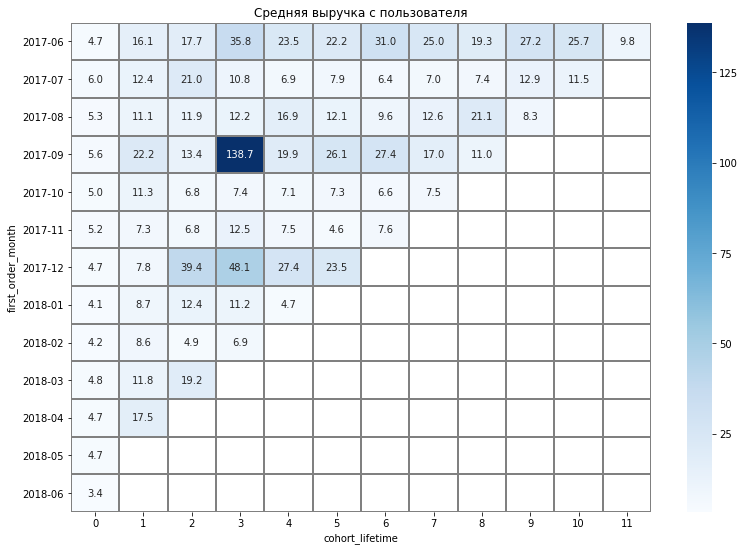

In [51]:
revenue_per_uid_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month', columns ='cohort_lifetime', values='revenue_per_uid')
plt.figure(figsize=(13, 9))
plt.title('Средняя выручка с пользователя')
sns.heatmap(revenue_per_uid_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap = 'Blues') 

Из данной таблицы видим, что средняя выручка во всех когортах после первого месяц lifetime возрастает. Это может быть связано с тем, что:
* пользователи начинают узнавать о большем количестве мероприятий посредством рассылки от Яндекс.Афиши

* сервис устраивает различные акции для уже действующих клиентов

Средняя выручка на пользователя сохраняется высоким в когортах июня, сентября и декабря 2017.

##### 4) Выясним, как меняется во времени накопительный LTV по когортам.

In [52]:
costs['order_month'] = costs['dt'].astype('datetime64[M]') 

In [53]:
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index() # Посчитаем количество новых покупателей за каждый месяц
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

first_order_month  n_buyers
0         2017-06-01      2023
1         2017-07-01      1923
2         2017-08-01      1370
3         2017-09-01      2581
4         2017-10-01      4340
5         2017-11-01      4081
6         2017-12-01      4383
7         2018-01-01      3373
8         2018-02-01      3651
9         2018-03-01      3533
10        2018-04-01      2276
11        2018-05-01      2988
12        2018-06-01         1

In [54]:
cohorts = orders.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index() # Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа, и сложим выручку
cohorts

first_order_month order_month   revenue
0         2017-06-01  2017-06-01   9557.49
1         2017-06-01  2017-07-01    981.82
2         2017-06-01  2017-08-01    885.34
3         2017-06-01  2017-09-01   1931.30
4         2017-06-01  2017-10-01   2068.58
..               ...         ...       ...
74        2018-03-01  2018-05-01   1114.87
75        2018-04-01  2018-04-01  10600.69
76        2018-04-01  2018-05-01   1209.92
77        2018-05-01  2018-05-01  13925.76
78        2018-06-01  2018-06-01      3.42

[79 rows x 3 columns]

In [55]:
report = cohort_sizes.merge(cohorts, on='first_order_month')

margin_rate = 1 # маржинальность сервиса принимаем за 100%
    
report['gp'] = report['revenue'] * margin_rate # находим валовую прибыль, умножив выручку на маржинальность
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report

first_order_month  n_buyers order_month   revenue        gp  age
0         2017-06-01      2023  2017-06-01   9557.49   9557.49    0
1         2017-06-01      2023  2017-07-01    981.82    981.82    1
2         2017-06-01      2023  2017-08-01    885.34    885.34    2
3         2017-06-01      2023  2017-09-01   1931.30   1931.30    3
4         2017-06-01      2023  2017-10-01   2068.58   2068.58    4
..               ...       ...         ...       ...       ...  ...
74        2018-03-01      3533  2018-05-01   1114.87   1114.87    2
75        2018-04-01      2276  2018-04-01  10600.69  10600.69    0
76        2018-04-01      2276  2018-05-01   1209.92   1209.92    1
77        2018-05-01      2988  2018-05-01  13925.76  13925.76    0
78        2018-06-01         1  2018-06-01      3.42      3.42    0

[79 rows x 6 columns]

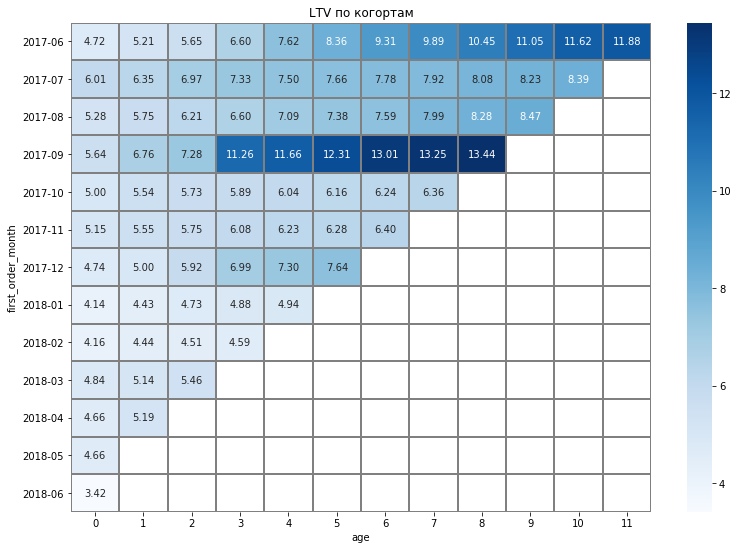

In [56]:
report['ltv'] = report['gp'] / report['n_buyers'] # Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте
report['first_order_month'] = report['first_order_month'].dt.strftime('%Y-%m')
    
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')

#TODO тут изменение не сохранились в фрейме
output = output.cumsum(axis=1).round(2)
    
output.fillna('')

plt.figure(figsize=(13, 9))
plt.title('LTV по когортам')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap = 'Blues') 

In [57]:
monthly_costs = costs.groupby('order_month').sum().reset_index()
report_new = report.merge(monthly_costs, on ='order_month')

Средний LTV за 6 месяцев после первой покупки:

In [58]:
final_result = report_new.pivot_table( index='first_order_month', columns='age', values='ltv', aggfunc='mean')
cum_ltv = final_result.cumsum(axis=1).mean(axis=0)[[0, 1, 2, 3, 4, 5]]
cum_ltv

age
0    4.916823
1    5.395666
2    5.821811
3    6.689763
4    7.298634
5    7.969053
dtype: float64

За шесть месяцев средний накопительный LTV увеличился до 7,9 у.е. Таким образом, чтобы вложения в маркетинг окупались, привлечение одного покупателя не должно превышать 7,9 у.е.

#### Вывод

Было расчитано время - разница между временем первого посещения и первой покупки.Из распределения мы видим, что наиболее часто пользователи покупают через примерно 90 000 секунд (25 часов).

Также видим выбивающиеся значения, приближенные к 0. А модой значений среди мобильных устройств является 0. Это может свидетельствовать о том, что данные выгружены некорректно или на сервисе при входе с мобильного устройства существует технические ограничения.

Больше всего покупок за представленный период совершают пользователи когорты июня 2017 года. Максимальные значения за сентябрь и декабрь 2017 года.

Представители остальных когорт (за исключением когорт марта и апреля 2018), совершают 2 и менее покупки в месяц. Также видим, что за декабрь 2017 почти все когорты совершили в среднем более 2 покупок. Меньше всего покупок совершалось за апрель 2018.

Средний чек во всех когортах после первого месяц lifetime возрастает. Это может быть связано с тем, что:
* пользователи начинают узнавать о большем количестве мероприятий посредством рассылки от Яндекс.Афиши

* сервис устраивает различные акции для уже действующих клиентов

Средний чек на пользователя сохраняется высоким в когортах июня, сентября и декабря 2017. Возможно для данных категорий проводились акции либо начислялись повышенные баллы в рамках программы лояльности, поэтому они используют данный сервис чаще всего.

За шесть месяцев средний накопительный LTV увеличился до 7,9 у.е. Таким образом, чтобы вложения в маркетинг окупались, привлечение одного покупателя не должно превышать 7,9 у.е

### 2.3 Маркетинговые метрики

##### 1) Сумма расходов на маркетинг

In [59]:
print('Общая сумма расходов на маркетинг: {}'.format(costs['costs'].sum()))

Общая сумма расходов на маркетинг: 329131.62


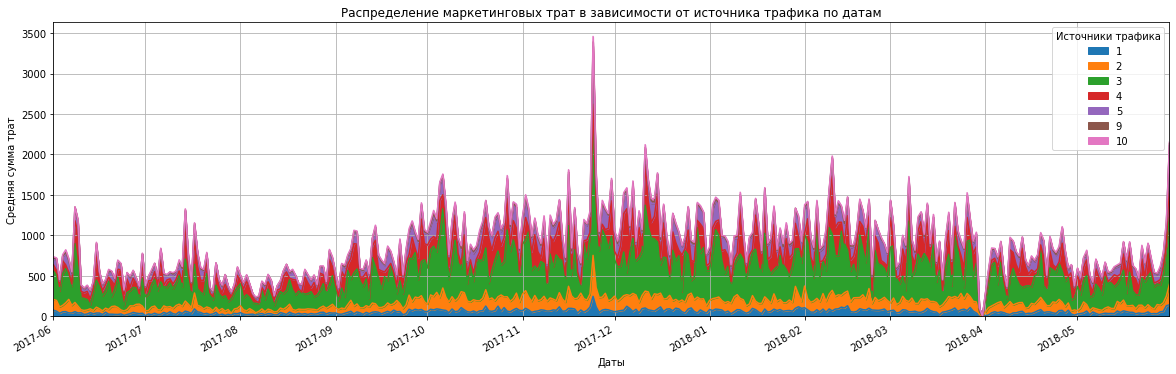

In [60]:
costs.pivot_table(index = ['dt'], values = 'costs', columns='source_id', aggfunc = 'mean').plot( style='-', kind = 'area', grid=True, figsize=(20, 6))
plt.title('Распределение маркетинговых трат в зависимости от источника трафика по датам')
plt.xlabel('Даты')
plt.ylabel('Средняя сумма трат')
plt.legend(title = 'Источники трафика')
plt.show()

Наибольшие траты происходили в конце ноября 2017 года. До пика траты были в среднем были низкие - до 500 у.е. После пика значительно увеличились до 1000 у.е. Более высокие суммы трат приходятся на источник 3.

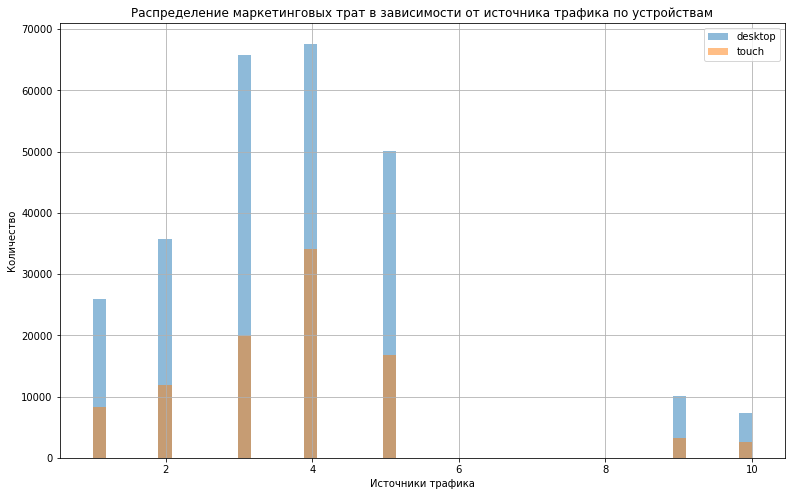

In [61]:
visits.query('device == "desktop"')['source_id'].hist(bins=50, figsize = (13, 8), alpha = 0.5, label='desktop')
visits.query('device == "touch"')['source_id'].hist(bins=50, figsize = (13, 8), alpha = 0.5, label='touch')
plt.title('Распределение маркетинговых трат в зависимости от источника трафика по устройствам')
plt.xlabel('Источники трафика')
plt.ylabel('Количество')
plt.legend()

Маркетинговые затраты на источники трафиков для десктопных устройств значительно превышают затраты для мобильных.

Из данного графика мы видим, что по устройствам самую большую сумму трат составляют источники 4 и 3, т.е. примерно 68 и 65 тыс соответственно. При этом траты на источники 9 и 10 - до 10000 у.е.

##### 2) Рассчитаем, сколько стоит привлечение одного покупателя из каждого источника трафика

Производим расчет в разрезе источников и месяцев.

In [62]:
# определяем источник пользователя
sources = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first'})
sources

source_id
uid                            
11863502262781                3
49537067089222                2
297729379853735               3
313578113262317               2
325320750514679               5
...                         ...
18446403737806311543          5
18446424184725333426          4
18446556406699109058          3
18446621818809592527          4
18446676030785672386          3

[228169 rows x 1 columns]

In [63]:
# соединяем первые покупки и источники 
payers = orders.groupby('uid').agg({'buy_ts': 'min'}).merge(sources, on = 'uid').reset_index()
payers = payers.rename(columns = {'buy_ts': 'first_buy'})
payers

uid           first_buy  source_id
0           313578113262317 2018-01-03 21:51:00          2
1          1575281904278712 2017-06-03 10:13:00         10
2          2429014661409475 2017-10-11 18:33:00          3
3          2464366381792757 2018-01-28 15:54:00          5
4          2551852515556206 2017-11-24 10:14:00          5
...                     ...                 ...        ...
36518  18445147675727495770 2017-11-24 09:03:00          5
36519  18445407535914413204 2017-09-22 23:55:00          3
36520  18445601152732270159 2018-03-26 22:54:00          2
36521  18446156210226471712 2018-02-18 19:34:00          3
36522  18446167067214817906 2017-10-17 10:16:00          5

[36523 rows x 3 columns]

In [64]:
# считаем ltv
ltv = payers.merge(orders, on = ['uid', 'first_buy'])
ltv['lifetime'] = ((ltv['buy_ts'] - ltv['first_buy']) / np.timedelta64(1,'M')).round().astype(int)
orders_lifetime = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc = 'count').fillna(0)
buyers_lifetime = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'uid', aggfunc = 'nunique').fillna(0)
ltv = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc = 'sum').fillna(0)
ltv = ltv.cumsum(axis = 1)

In [65]:
# добавляем размеры когорт и делим на них
cohort_sizes = payers.groupby('source_id').agg({'uid': 'nunique'}).rename(columns = {'uid': 'cohort_size'})
ltv = ltv.merge(cohort_sizes, on = 'source_id')
ltv = ltv.div(ltv['cohort_size'], axis = 0).drop(columns = 'cohort_size')
display(ltv.reset_index())

source_id         0         1         2          3          4          5  \
0          1  6.156185  7.150835  7.891156   8.537754   9.029303   9.251083   
1          2  6.770593  8.054740  9.717921  11.253637  11.900125  12.484390   
2          3  4.477694  4.729283  4.865748   5.008149   5.083093   5.122590   
3          4  4.584762  4.738128  4.852278   4.948617   5.068362   5.226563   
4          5  4.909883  5.114191  5.469974   6.836748   7.072747   7.246335   
5          7  1.220000  1.220000  1.220000   1.220000   1.220000   1.220000   
6          9  3.880901  4.167390  4.408024   4.678888   4.788189   4.935588   
7         10  3.164131  3.227434  3.254695   3.302558   3.316576   3.319217   

           6          7          8          9         10         11         12  
0   9.525826   9.866858  10.191256  10.450862  10.557561  10.673508  10.724577  
1  12.721418  12.948380  13.171358  13.233560  13.346994  13.380422  13.383802  
2   5.147003   5.173669   5.192354   5.197477   5.202699   5.203834   5.204931  
3   5.342363   5.391025   5.410340   5.448244   5.502627   5.505380   5.506685  
4   7.365203   7.454998   7.515129   7.576270   7.582746   7.592303   7.592558  
5   1.220000   1.220000   1.220000   1.220000   1.220000   1.220000   1.220000  
6   5.059127   5.126608   5.244430   5.284972   5.293566   5.293566   5.293566  
7   3.332724   3.343348   3.346102   3.348631   3.348631   3.348631   3.348631

In [66]:
# считаем САС
cac = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index().merge(cohort_sizes.reset_index(), left_on = 'source_id', right_on='source_id')
cac['cac'] = cac['costs'] / cac['cohort_size']
cac = cac.reset_index()
display(cac)

fig = px.bar(cac, x = 'source_id', y = 'cac', color = 'costs', width=1000, height=600, title = 'Cтоимость привлечения одного покупателя из каждого источника')
fig.show()

index  source_id      costs  cohort_size        cac
0      0          1   20833.27         2899   7.186364
1      1          2   42806.04         3506  12.209367
2      2          3  141321.63        10473  13.493901
3      3          4   61073.60        10296   5.931779
4      4          5   51757.10         6931   7.467479
5      5          9    5517.49         1088   5.071222
6      6         10    5822.49         1329   4.381106

Рассчитав стоимость привлечения одного покупателя из каждого источника, видим, что больше всего затрат приходится на источники 2 и 3 - 12,2 и 13,5 у.е. соответственно. На источники 9 и 10 затраты минимальны.

##### 3) Рассчитаем ROMI по когортам в разбивке по источникам

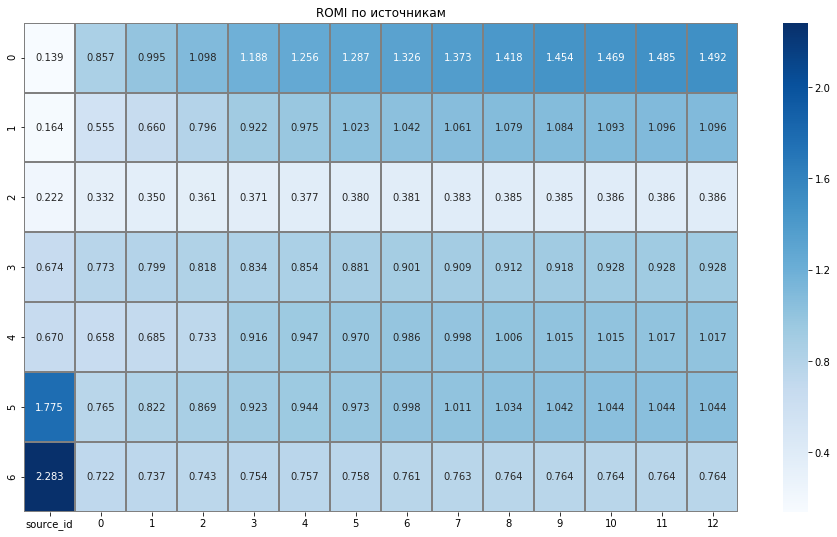

In [67]:
# считаем ROMI
romi = ltv.merge(cac, on = 'source_id')
romi = romi.div(romi['cac'], axis = 0).drop(columns = ['cac', 'cohort_size', 'index', 'costs'])

plt.figure(figsize=(16, 9))
plt.title('ROMI по источникам')
sns.heatmap(romi, annot=True, fmt='.3f', linewidths=1, linecolor='gray', cmap = 'Blues')

Рассмотрим, сколько месяцев нужно каждой когорте, чтобы окупить маркетинговые затраты.

Когорта третьего, четвертого и десятого источника не окупилась в течение всего периода.

Наибольший результат по окупаемости показала когорта первого источника. Она окупилась уже в 3 месяце lifetime и в течение всего периода имеет наивысший показатель.

Когорта второго источника находится на втором месте по высоким показателям ROMI. Стала окупаться с 6 месяца lifeteme. На третьем - когорта девятого источника.

#### Вывод

Наибольшие траты происходили в конце ноября 2017 года. До пика траты в среднем были низкие - до 500 у.е. После пика значительно увеличились до 1000 у.е. Более высокие суммы трат приходятся на источник 3.

Маркетинговые затраты на источники трафиков для десктопных устройств значительно превышают затраты на источники для мобильных.

Рассчитав стоимость привлечения одного покупателя из каждого источника, видим, что больше всего затрат приходится на источники 2 и 3 - 12,2 и 13,5 у.е. соответственно. На источники 9 и 10 затраты минимальны.

Параметр ROMI показал следующее:

* Когорта третьего, четвертого и десятого источника не окупилась в течение всего периода.

* Наибольший результат по окупаемости показала когорта первого источника. Она окупилась уже в 3 месяце lifetime и в течение всего периода имеет наивысший показатель.

* Когорта второго источника находится на втором месте по высоким показателям ROMI. Стала окупаться с 6 месяца lifeteme. На третьем - когорта девятого источника.

### Вывод

Проанализировав `продуктовые метрики`, мы обнаружили, что с десктопных устройств привлекается больше новых пользователей, пользователи чаще в среднем посещают сервис и их сессии более длительные, чем с мобильных устройств.

Можно предположить, что высокий пик посещений и длительности сессий связан с проведением акции в конце ноября 2017, привлекающей новых клиентов(т.к. количество новых пользователей после этого пика стало выше, чем до него). Примерно в то же время мы обнаружили резкое увеличение маркетинговых затрат.

Низкий пик посещений и длительности сессий в марте 2018 может свидетельствовать о том, что на сервисе в тот день произошел технический сбой.

`Метрики электронной коммерции` показали, что наиболее часто пользователи покупают примерно через 60 секунд. Вместе с этим модой значений среди мобильных устройств является 0. Это может свидетельствовать о том, что данные выгружены некорректно или на сервисе при входе с мобильного устройства существует технические ограничения.

Больше всего покупок за представленный период совершают пользователи когорты июня 2017 года. Максимальные значения за сентябрь и декабрь 2017 года.

Представители остальных когорт (за исключением когорт марта и апреля 2018), совершают 2 и менее покупки в месяц. Также видим, что за декабрь 2017 почти все когорты совершили в среднем более 2 покупок. Меньше всего покупок совершалось за апрель 2018.

Средняя выручка во всех когортах после первого месяц lifetime возрастает. Это может быть связано с тем, что:
* пользователи начинают узнавать о большем количестве мероприятий посредством рассылки от Яндекс.Афиши

* сервис устраивает различные акции для уже действующих клиентов

Средняя выручка на пользователя сохраняется высоким в когортах июня, сентября и декабря 2017. Возможно для данных категорий проводились акции либо начислялись повышенные баллы в рамках программы лояльности, поэтому они используют данный сервис чаще всего.

За шесть месяцев средний накопительный LTV увеличился до 7,9 у.е. Таким образом, чтобы вложения в маркетинг окупались, привлечение одного покупателя не должно превышать 7,9 у.е

Наибольшие `маркетинговые затраты` происходили в конце ноября 2017 года. Более высокие суммы трат приходятся на источник 3.

Маркетинговые затраты на источники трафиков для десктопных устройств значительно превышают затраты на источники для мобильных.

Рассчитав стоимость привлечения одного покупателя из каждого источника, видим, что больше всего затрат приходится на источники 2 и 3 - 12,2 и 13,5 у.е. соответственно. На источники 9 и 10 затраты минимальны.

Расчет ROMI показал следующее:

* Когорта третьего, четвертого и десятого источника не окупилась в течение всего периода.

* Наибольший результат по окупаемости показала когорта первого источника. Она окупилась уже в 3 месяце lifetime и в течение всего периода имеет наивысший показатель.

* Когорта второго источника находится на втором месте по высоким показателям ROMI. Стала окупаться с 6 месяца lifeteme. На третьем - когорта шестого источника.

Из вышесказанного следует:

* Пользователи больше предпочитают использовать сервис с десктопных устройств, что показали продуктовые метрики. Вместе с этим, мы обнаружили недостоверные данные сессий с мобильных устройств, которые могут быть следствием технических неисправностей, мешающих совершать покупки. Поэтому маркетологам нужно увеличивать долю затрат на трафики для десктопных устройств, пока

* Маркетологам следует делать упор на источники трафика 1,2,9, т.к. затраты по когортам данных источников достаточно быстро окупились. 

* 3 источник трафика является абсолютно неэффективным и имеет минимальный ROMI - 0,38 на конец периода, при этом стоимость привлечения одного покупателя имеет самую высокую. Данный источник рекомедуется пересмотреть. Поскольку много клиентов проходят по этому каналу с мобильных устройств, возможно неэффективность связана с вышеуказанной технической причиной.